In [1]:
#Importación de Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [3]:
df = pd.read_csv(r"C:/Users/cecil/Downloads/articulos_ml.csv")


# Limpieza de columnas numéricas
cols_num = ["Word count", "# of Links", "# of comments", "# Images video", "Elapsed days", "# Shares"]
df[cols_num] = df[cols_num].apply(pd.to_numeric, errors="coerce")

df.head()


,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
#Selección de variables (X, y)
features = ["Word count", "# of Links", "# of comments", "# Images video", "Elapsed days"]
target = "# Shares"

X = df[features]
y = df[target]


In [6]:
#División Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
#Creación del Pipeline (Imputer + Scaler + Ridge)
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])


In [10]:
#Búsqueda de hiperparámetros (GridSearchCV)
param_grid = {
    "ridge__alpha": [0.01, 0.1, 1, 10, 100, 500, 1000]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejor alpha:", grid.best_params_)



Mejor alpha: {'ridge__alpha': 1000}


In [12]:
# Evaluación del modelo 
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

# Cálculo de RMSE compatible con versiones antiguas de sklearn
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 21103.127012360317
R²: -0.17708012599184908


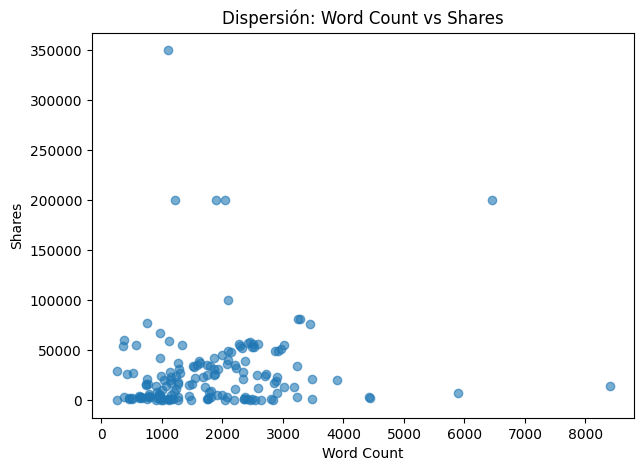

In [13]:
#Gráfica de dispersión (Word count vs # Shares)
plt.figure(figsize=(7,5))
plt.scatter(df["Word count"], df["# Shares"], alpha=0.6)
plt.xlabel("Word Count")
plt.ylabel("Shares")
plt.title("Dispersión: Word Count vs Shares")
plt.show()

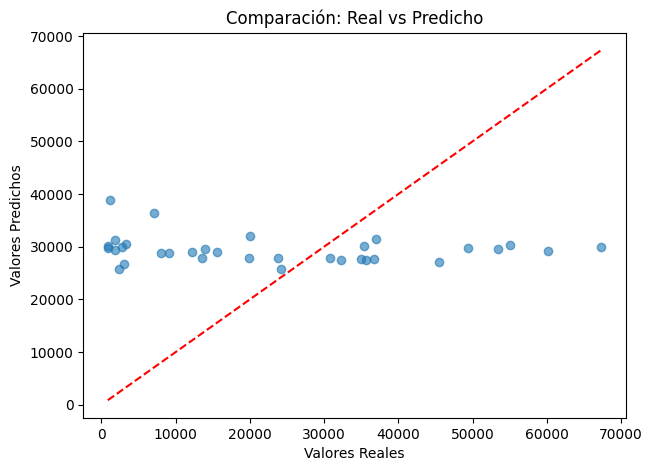

In [14]:
#Gráfica Real vs Predicho
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación: Real vs Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [15]:
#Guardado del modelo entrenado
with open("ridge_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Modelo guardado como ridge_model.pkl")


Modelo guardado como ridge_model.pkl
